In [87]:
import requests
import bs4
import pandas as pd
import os
import re
import networkx as nx
from IPython.display import Image
from IPython.display import display
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

## Extraction à partir du bon coin des annonce

La démarche est la suivante:
    - récupération de l'url de la recherche sur le bon coin avec la requête "kéfir", recherche sur l'ensemble de la France
    - parcourir les pages et récupérer les liens des annonces
    - parser chaque annonce pour récupérer l'information pertinente
    - stocker dans un fichier

Définition des fonctions de parsing de la page des annonces pour récupérer les différentes informations intéressantes

In [45]:
def title(page):
    return page.find("h1",{"class":"no-border"}).text.replace("\n","").replace("\t","").strip()
def content(page):
    return page.find("p",{"itemprop":"description"}).text
def date(page):
    try:
        try:
            return page.find("p",{"class":"line line_pro"}).text.split("Mise en ligne le ")[-1].split(". \n")[0]
        except:
            return  "NA"
    except:
        return "NA"
def seller(page):
    try:
        return page.find("a",{"class":"uppercase bold trackable"}).text
    except:
        return "NA"
def loc(page):
    try:
        return page.find("span",{"itemprop":"address"}).text.replace("\n","")
    except:
        return "NA"
def prix(page):
    try:
        return page.find("span",{"class":"value"}).text.replace("\n","").replace("\t","").strip()
    except:
        return "NA"
def img(page):
    try:
        return page.find("a",{"id":"image"})["style"].split("url('")[-1].split("')")[0]
    except:
        return "NA"
def idobj(lien):
    try:
        return page.find("div",{"id":"descItemNumber"}).text
    except:
        return "NA"

Boucle sur l'ensemble des pages de la recherche (6 pages), récupération des liens et boucle sur l'ensemble des liens de chaque page pour parser les annonces

In [49]:
infos = []
for p in range(1,7):
    url = "http://www.leboncoin.fr/annonces/offres/ile_de_france/occasions/?o="+str(p)+"&q=kefir"
    data = bs4.BeautifulSoup(requests.get(url).content)
    u = data.find("section",{"class":"tabsContent"}).findAll("a")
    for i in u:
        lien = i["href"].replace("//","http://")
        name = lien.split("/")[-1].split("?")[0]
        print(lien)
        d = bs4.BeautifulSoup(requests.get(lien).content)
        infos.append([name,lien,title(d),date(d),seller(d),loc(d),prix(d),content(d)])

http://www.leboncoin.fr/vins_gastronomie/981120259.htm?ca=12_s
http://www.leboncoin.fr/vins_gastronomie/981058598.htm?ca=12_s
http://www.leboncoin.fr/arts_de_la_table/981035760.htm?ca=12_s
http://www.leboncoin.fr/vins_gastronomie/980776222.htm?ca=12_s
http://www.leboncoin.fr/vins_gastronomie/980766371.htm?ca=12_s
http://www.leboncoin.fr/vins_gastronomie/980676585.htm?ca=12_s
http://www.leboncoin.fr/arts_de_la_table/980601122.htm?ca=12_s
http://www.leboncoin.fr/vins_gastronomie/953061956.htm?ca=12_s
http://www.leboncoin.fr/vins_gastronomie/980413317.htm?ca=12_s
http://www.leboncoin.fr/jardinage/980312011.htm?ca=12_s
http://www.leboncoin.fr/vins_gastronomie/952874034.htm?ca=12_s
http://www.leboncoin.fr/autres/980118532.htm?ca=12_s
http://www.leboncoin.fr/arts_de_la_table/979506540.htm?ca=12_s
http://www.leboncoin.fr/vins_gastronomie/818345871.htm?ca=12_s
http://www.leboncoin.fr/vins_gastronomie/952016362.htm?ca=12_s
http://www.leboncoin.fr/vins_gastronomie/979044443.htm?ca=12_s
http://ww

/Users/user/anaconda/envs/p3/lib/python3.4/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Construction d'un DataFrame Pandas

In [62]:
infos = pd.DataFrame(infos)
infos

,0,1,2,3,4,5,6,7
0,981120259.htm,http://www.leboncoin.fr/vins_gastronomie/98112...,Graines de Kéfir de fruits,15 juin à 15:40,foure,Rochefort 17300,6 €,Le kéfir est un probiotique naturel originaire...
1,981058598.htm,http://www.leboncoin.fr/vins_gastronomie/98105...,Grains de kéfir de lait,15 juin à 13:55,Laura,Cesson 77240,2 €,je vends des grains de kéfir pour faire du kéf...
2,981035760.htm,http://www.leboncoin.fr/arts_de_la_table/98103...,Grains de Kéfir de fruit bio,15 juin à 13:02,Alexandra,Schiltigheim 67300,4 €,"On lui connait différentes vertus, mais le Kéf..."
3,980776222.htm,http://www.leboncoin.fr/vins_gastronomie/98077...,Kéfir de fruits,14 juin à 19:38,GIL,Parmain 95620,Parmain 95620,Donne grains de kéfir de fruits.à venir cherch...
4,980766371.htm,http://www.leboncoin.fr/vins_gastronomie/98076...,Grains de Kefir de fruits bios - probiotique n...,14 juin à 19:18,Revif45,Bellegarde 45270,5 €,Grains de Kefir de fruits bios - probiotique n...
5,980676585.htm,http://www.leboncoin.fr/vins_gastronomie/98067...,Grains de Kéfir,14 juin à 16:17,Marie,Lyon 69001,5 €,"Grains FRAIS de kéfir à fruitBien entretenus, ..."
6,980601122.htm,http://www.leboncoin.fr/arts_de_la_table/98060...,Kefir,14 juin à 14:05,pascal,Venise 25870,3 €,VENDS KEFIR 3 €ME CONTACTER AU 06 77 96 09 80
7,953061956.htm,http://www.leboncoin.fr/vins_gastronomie/95306...,Graines de kefir de fruits,14 juin à 10:29,baric,Jard-sur-Mer 85520,Jard-sur-Mer 85520,cède gratuitement sachet de 150 gr de graines ...
8,980413317.htm,http://www.leboncoin.fr/vins_gastronomie/98041...,Donne grains de kéfirs - Paris 15 ou envoi postal,14 juin à 00:06,Celine,Paris 75015,Paris 75015,Donne grains de kéfir à venir chercher à Paris...
9,980312011.htm,http://www.leboncoin.fr/jardinage/980312011.ht...,graine de kéfir,13 juin à 19:47,Thomas,Albertville 73200,1 €,sous forme déshydratée je les envoie par la poste


Sauvegarde sous un fichier excel

In [63]:
infos.to_excel("leboncoin-kefir-15062016.xls")

Le fichier est modifié pour recoder le type de kéfir, le prix, et le poids quand ces valeurs sont mentionnées

On recharge le fichier

In [107]:
data = pd.read_excel("leboncoin-kefir-15062016.xls")

On crée les colonnes nécessaires : type de transaction ; prix au gramme

In [108]:
def fun(row):
    if row["prix"] not in ["donne","échange","cherche"]:
        return "vente"
    else:
        return row["prix"]
data["transaction"] = data.apply(fun,axis=1)

def fun(row):
    if row["prix"] not in ["donne","échange","cherche"]:
        return int(row["prix"])
    else:
        return "NA"
data["prix"] = data.apply(fun,axis=1)

def fun(row):
    try:
        return int(row["poids"])
    except:
        return "NA"
data["poids_reco"] = data.apply(fun,axis=1)

def fun(row):
    try:
        return round(row["prix"]/row["poids_reco"],3)
    except:
        return "NA"
data["poids_gramme"] = data.apply(fun,axis=1)

## Traitement des données

Réparitition des types d'annonces

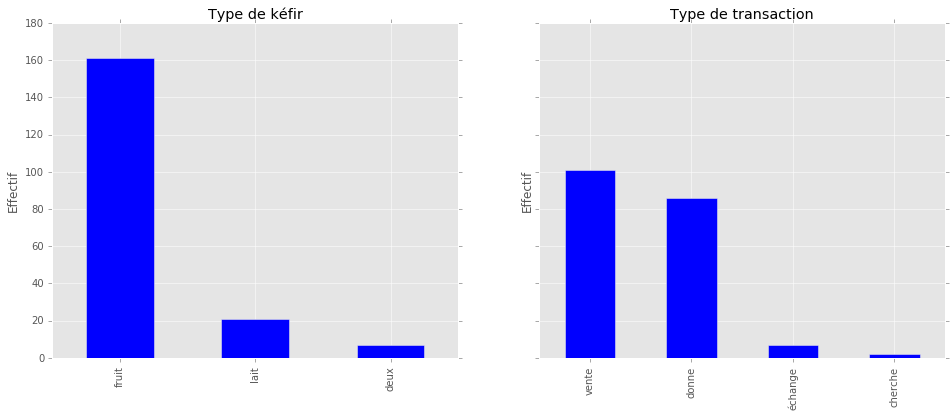

In [156]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

data["type"].value_counts().plot(kind="bar",ax=ax[0])
ax[0].set_title("Type de kéfir")
ax[0].set_ylabel("Effectif")

data["transaction"].value_counts().plot(kind="bar",ax=ax[1])
ax[1].set_title("Type de transaction")
ax[1].set_ylabel("Effectif")

Tableau croisé des types de kéfir / transactions

In [175]:
pd.crosstab(data.type,data.transaction )

transaction,cherche,donne,vente,échange
type,,,,
deux,0,2,5,0
fruit,1,75,78,7
lait,1,5,15,0


Répartition des prix des annonces sur le kéfir

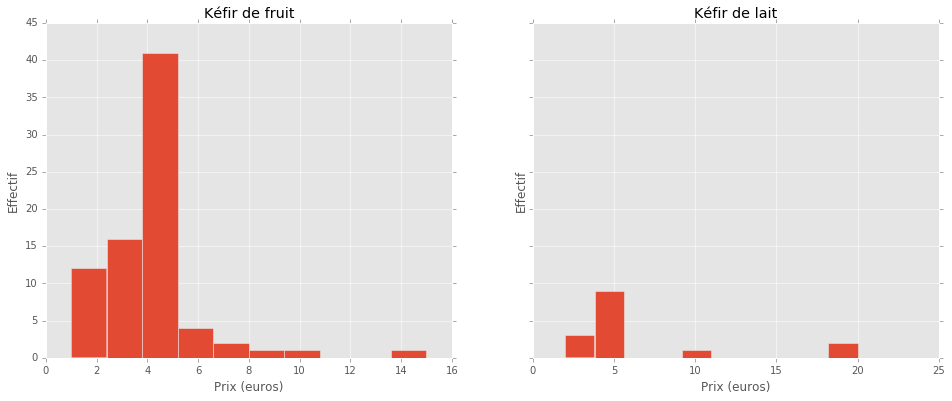

In [157]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
data[(data["prix"]!="NA") & (data["type"]=="fruit")]["prix"].hist(ax=ax[0])
ax[0].set_title("Kéfir de fruit")
ax[0].set_ylabel("Effectif")
ax[0].set_xlabel("Prix (euros)")
data[(data["prix"]!="NA") & (data["type"]=="lait")]["prix"].hist(ax=ax[1])
ax[1].set_title("Kéfir de lait")
ax[1].set_ylabel("Effectif")
ax[1].set_xlabel("Prix (euros)")

Prix au gramme du kéfir

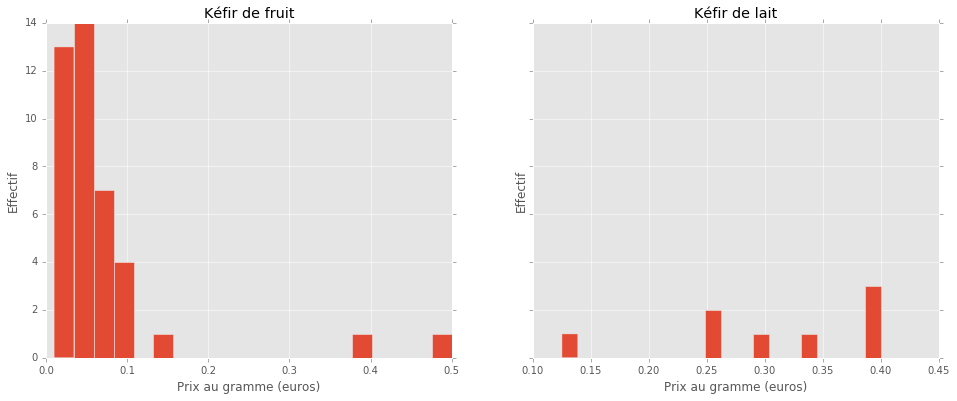

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
data[(data["poids_gramme"]!="NA") & (data["type"]=="fruit")]["poids_gramme"].hist(ax=ax[0],bins=20)
ax[0].set_title("Kéfir de fruit")
ax[0].set_ylabel("Effectif")
ax[0].set_xlabel("Prix au gramme (euros)")
data[(data["poids_gramme"]!="NA") & (data["type"]=="lait")]["poids_gramme"].hist(ax=ax[1],bins=20)
ax[1].set_title("Kéfir de lait")
ax[1].set_ylabel("Effectif")
ax[1].set_xlabel("Prix au gramme (euros)")